Notebook created: 2018-03-20 23:51:39  
Generated from: _build_py/py/scipy.rst  

## SciPy

SciPy is a collection of functions that perform common scientific operations, such as

* optimization
* root finding
* linear algebra
* interpolation
* numerical integration




Functionality is divided by subpackage

* `scipy.optimize`  holds optimization and root finding routines
* `scipy.integrate` holds numerical integration routines 

Let's start with standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### stats

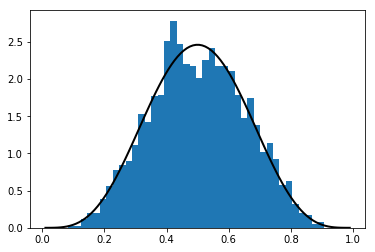

In [10]:
from scipy.stats import beta

q = beta(5, 5)          # Beta(a, b), with a = b = 5
obs = q.rvs(2000)       # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [8]:
q.cdf(0.4)      # Cumulative distribution function

0.26656768000000003

In [9]:
q.pdf(0.4)      # Density function

2.0901888000000013

In [11]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.6339134834642708

In [12]:
q.mean()

0.5

### Root finding

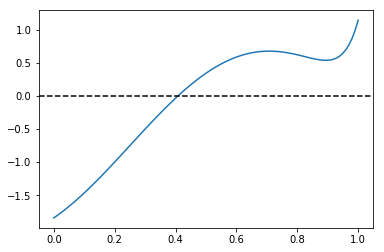

In [17]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

plt.figure()
plt.plot(x, f(x))
plt.axhline(ls='--', c='k')
plt.show()

In [18]:
from scipy.optimize import bisect

bisect(f, 0, 1)

0.4082935042806639

In [19]:
from scipy.optimize import newton

newton(f, 0.2)   # Start the search at initial condition x = 0.2

0.4082935042793568

But here `newton` fails:

In [21]:
newton(f, 0.7)   # Start the search at x = 0.7 instead

0.7001700000000282

In [22]:
%timeit bisect(f, 0, 1)

50.4 µs ± 959 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit newton(f, 0.2)

13.1 µs ± 60.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
from scipy.optimize import brentq
brentq(f, 0, 1)

0.40829350427936706

In [26]:
%timeit brentq(f, 0, 1)

12.8 µs ± 65.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Fixed points and scalar optimization

In [29]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)  # 10.0 is an initial guess

array(1.)

In [30]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

#### Numerical Integration

In [31]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
integral

0.33333333333333337

### References:

Full docs are here: https://docs.scipy.org/doc/scipy/reference/index.html